# Image Quality Assessment

###### Oleh : Nur Asiah 0102514015


Keterangan eksplorasi 

Dataset yang dipakai adalah data gambar dari toko online OLX Indonesia yan sudah diberi label [`good`, `bad`].

Gambar memiliki ukuran pixel yang sama yaitu 200*300


In [1]:
from __future__ import print_function
from collections import Counter


import glob
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", context="talk", palette="Set3")
RANDOM_STATE = 2401
np.random.seed(RANDOM_STATE)

%matplotlib inline

## Eksplorasi data

Jalankan cell di bawah hanya jika tidak memiliki file numpy.

In [3]:
X = []
y = []

for kelas in ['good', 'bad']:
    for img in glob.glob('dataset/'+ kelas +'/*'):
        y += [kelas]
        image = cv2.imread(img)
        X += [np.array(image)]

#X = np.asarray(X)
#y = np.asarray(y)

In [4]:
np.save('images.npy', X)
np.save('labels.npy', y)

Load images

In [3]:
X = np.load('images.npy')
y = np.load('labels.npy') 

Size of dataset

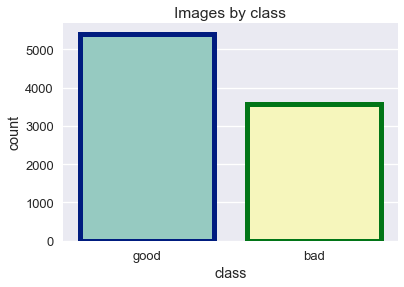

In [4]:
sns.countplot(y, linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.title('Images by class')
plt.xlabel('class')
plt.show()

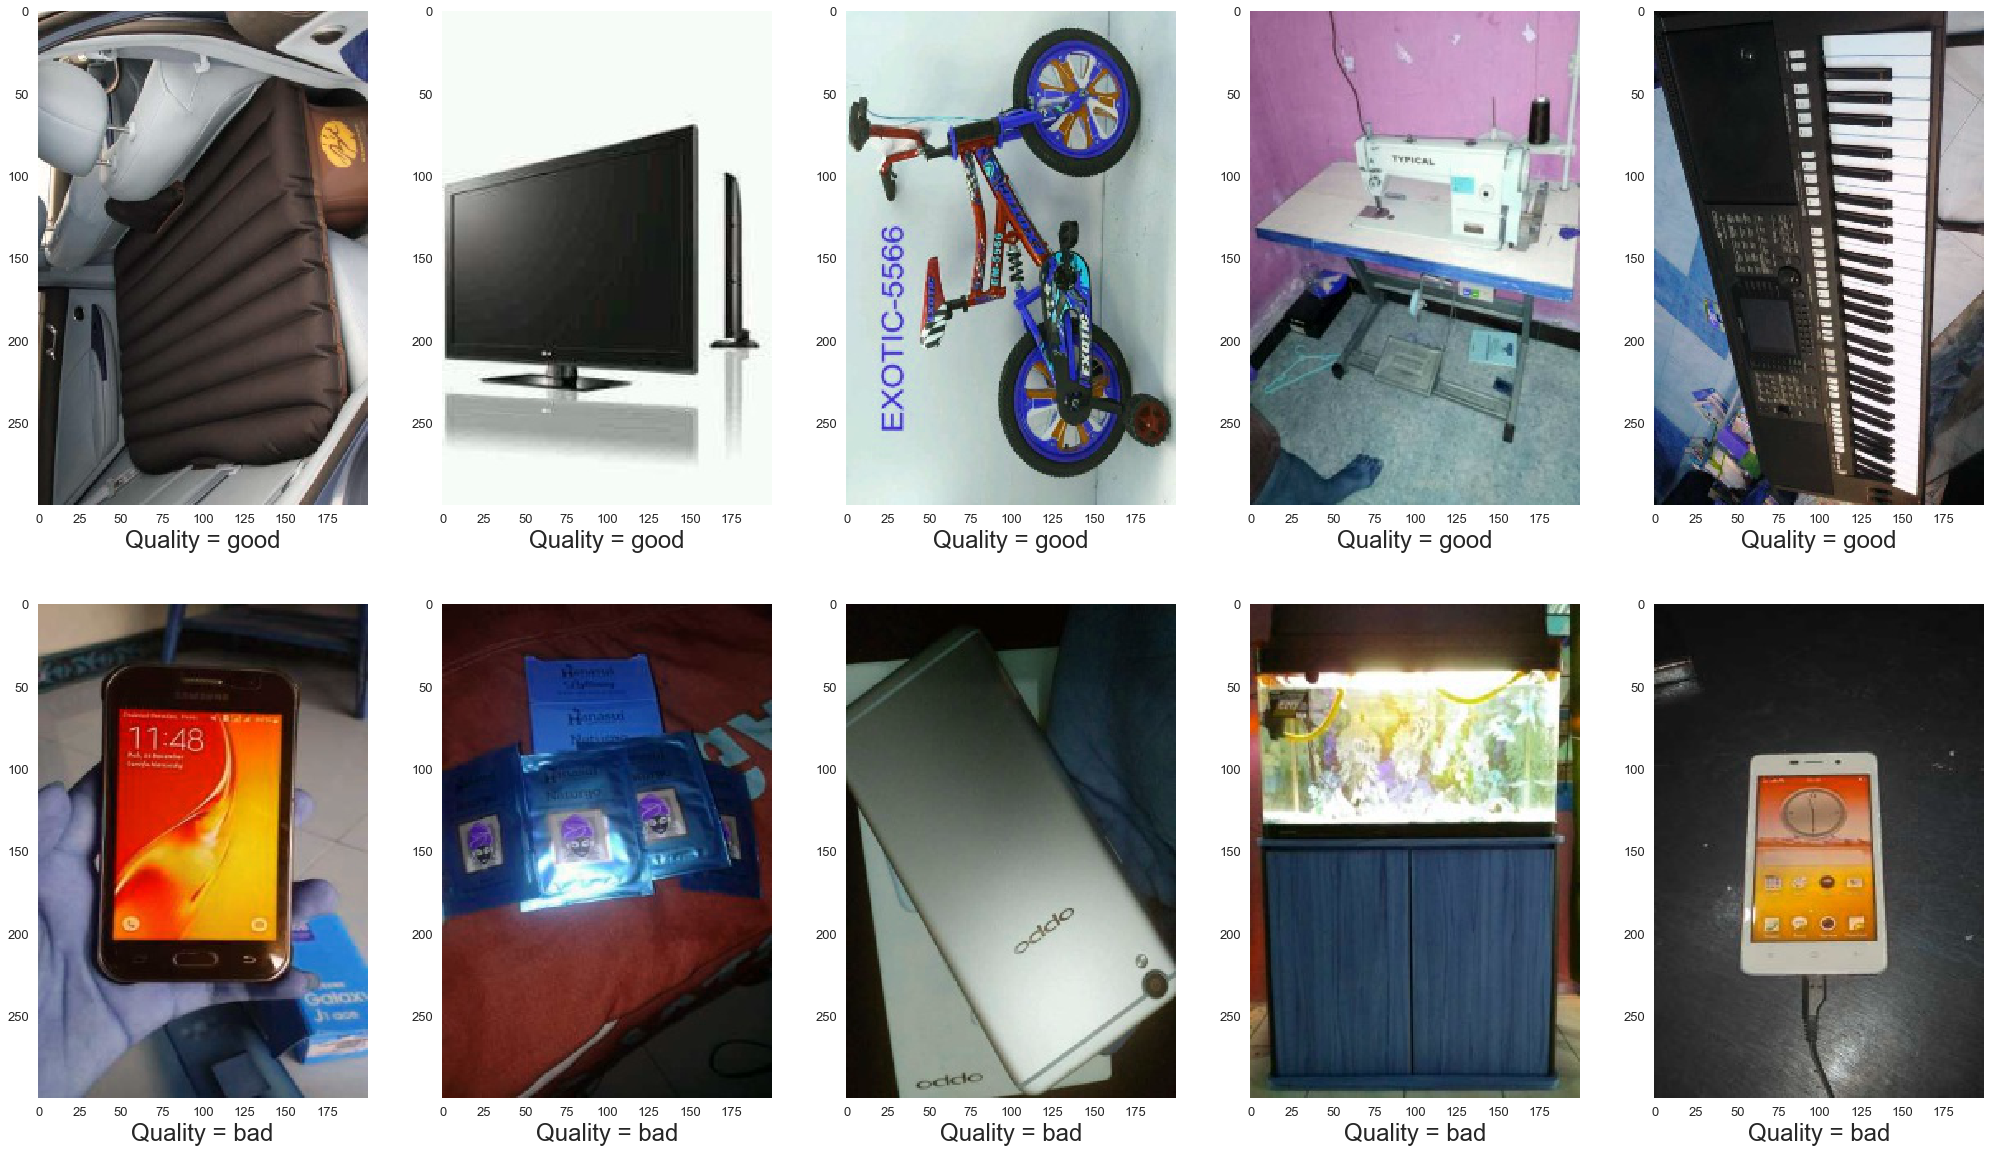

In [4]:
fig = plt.figure(figsize=(35,20))
count = 1
for kelas in ['good', 'bad']:
    images_by_class, label_by_class = X[y == kelas], y[y == kelas]
    for i in range(5):
        fig.add_subplot(2,5,count)
        rand = np.random.randint(0, images_by_class.shape[0])
        plt.imshow(images_by_class[rand], cmap = None)
        count += 1
        
        plt.grid(False)
        plt.xlabel('Quality = ' + str(label_by_class[rand]), fontsize=24)
plt.show()

#### Histogram of Image

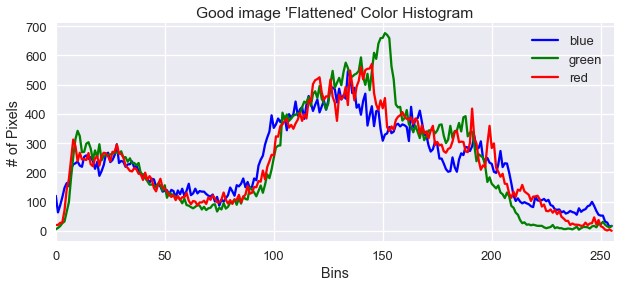

In [5]:
chans = cv2.split(X[500])
colors = ("blue", "green", "red")
plt.figure(figsize=(10,4))
plt.title("Good image 'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    plt.plot(hist, color = color, label=color)
    plt.xlim([0, 256])

plt.legend(loc='best')
plt.show()

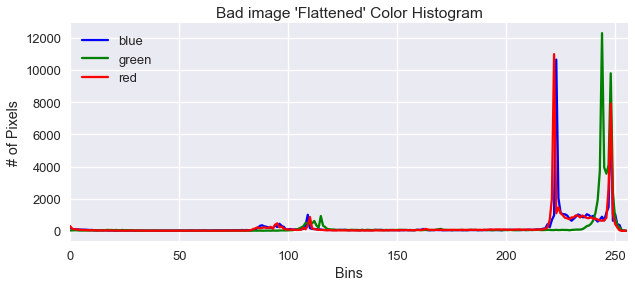

In [6]:
chans = cv2.split(X[X.shape[0]-100])
colors = ("blue", "green", "red")
plt.figure(figsize=(10,4))
plt.title("Bad image 'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over the image channels
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    plt.plot(hist, color = color, label=color)
    plt.xlim([0, 256])

plt.legend(loc='best')
plt.show()

### Calculate blurness of an image